# Pierwszy i drugi milestone projektu 2. z przedmiotu WUM
### Alicja Charuza, Mateusz Gałęziewski

Poniżej przedstawiamy naszą pracę związaną z preprocessingiem danych oraz tworzeniem modeli uczenia nienadzorowanego na podstawie [zbioru danych na temat chorób serca](https://www.kaggle.com/datasets/kingabzpro/heart-disease-patients?select=heart_disease_patients.csv).

## #1 Preprocessing

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

Wczytywanie danych i podział na zbiór do budowy i do walidacji.

In [4]:
def load_split():
    df = pd.read_csv('data/heart_disease_patients.csv')
    train_data, val_data = train_test_split(df, test_size=0.3, random_state=42)
    train_data.reset_index(inplace=True, drop=True)
    val_data.reset_index(inplace=True, drop=True)
    return train_data.drop(['id'], axis=1), val_data.drop(['id'], axis=1)

In [5]:
df, val_data = load_split()

Sprawdźmy, jak wyglądają mniej więcej dane.

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,65,1,1,138,282,1,2,174,0,1.4,2
1,62,1,4,120,267,0,0,99,1,1.8,2
2,57,1,3,150,168,0,0,174,0,1.6,1
3,57,1,4,140,192,0,0,148,0,0.4,2
4,58,0,4,100,248,0,2,122,0,1.0,2


Dowiedzmy się trochę więcej o wartościach w poszczególnych kolumnach.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 18.3 KB


Czyli nie mamy żadnych wierszy z brakami danych.

Spróbujmy na podstawie informacji z kaggla, wyjaśnić znaczenie poszczególnych kolumn.

### Wyjaśnienie kolumn
|kolumna|opis|typ|
|:-:|:--|:-:|
|id|indeks|numeryczny|
|age|wiek|numeryczny|
|sex|płeć|kategoryczny|
|cp|typ bólu klatki piersiowej|kategoryczny|
|trestbps|ciśnienie krwi w spoczynku (w momencie przyjęcia do szpitala) w mm/Hg|numeryczny|
|chol|poziom cholesterolu w surowicy w mg/dl|numeryczny|
|fbs|poziom cukru na czczo w mg/dl > 120 (1 = true, 0 = false)|kategoryczny|
|restecg|wyniki ekg w spoczynku|kategoryczny|
|thalach|maksymalne tętno|numeryczny|
|exang|dławica wysiłkowa (1 = true, 0 = false)|kategoryczny|
|oldpeak|obniżenie odcinka ST wywołane wysiłkiem w porównaniu do spoczynku|numeryczny|
|slope|spadek odcinka ST podczas szczytowego wysiłku|kategoryczny|

### Wyjaśnienie jednostek
|jednostka|opis|
|:-:|:-:|
|mm/Hg|milimetry słupa rtęci|
|mg/dl|miligramy na decylitr|

Spójrzmy, jak wyglądają podstawowe statystyki zmiennych.

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.712264,0.660377,3.117925,132.386792,245.905660,0.122642,0.985849,150.452830,0.339623,1.042453,1.599057
std,9.173279,0.474702,0.988205,18.690328,47.490289,0.328802,0.999899,22.125507,0.474702,1.212060,0.626885
min,34.000000,0.000000,1.000000,94.000000,149.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000
25%,47.000000,0.000000,2.000000,120.000000,212.000000,0.000000,0.000000,137.750000,0.000000,0.000000,1.000000
50%,55.500000,1.000000,3.000000,130.000000,240.500000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000
75%,62.000000,1.000000,4.000000,140.500000,273.000000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000
max,77.000000,1.000000,4.000000,200.000000,417.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000


Zastosujemy one hot encoding dla kolumn o wartościach kategorycznych z liczbą kategorii większą niż dwa. Są to *cp*, *restecg*, *slope*.

In [9]:
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(df[['cp', 'restecg', 'slope']]).toarray())
encoded_column_names = enc.get_feature_names_out(['cp', 'restecg', 'slope'])
enc_data.columns = encoded_column_names
df = (df.drop(['cp', 'restecg', 'slope'], axis=1)).join(enc_data)

In [10]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,cp_3,cp_4,restecg_0,restecg_1,restecg_2,slope_1,slope_2,slope_3
0,65,1,138,282,1,174,0,1.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,62,1,120,267,0,99,1,1.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,57,1,150,168,0,174,0,1.6,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,57,1,140,192,0,148,0,0.4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,58,0,100,248,0,122,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Spróbujemy teraz znormalizować/standaryzować dane. Jednak najpierw przyjrzyjmy się rozkładom poszczególnych zmiennych.

Text(0.5, 1.0, 'age')

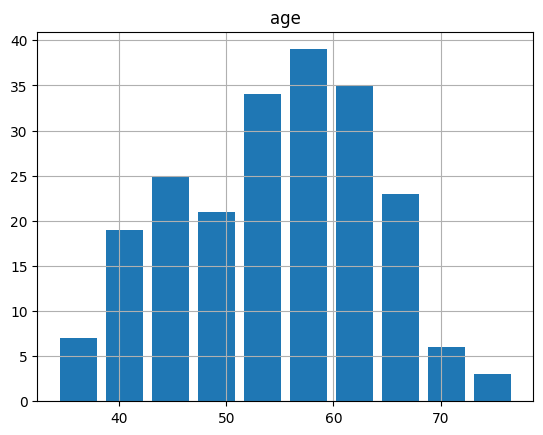

In [64]:
df['age'].hist(rwidth=0.8)
plt.title('age')

Text(0.5, 1.0, 'trestbps')

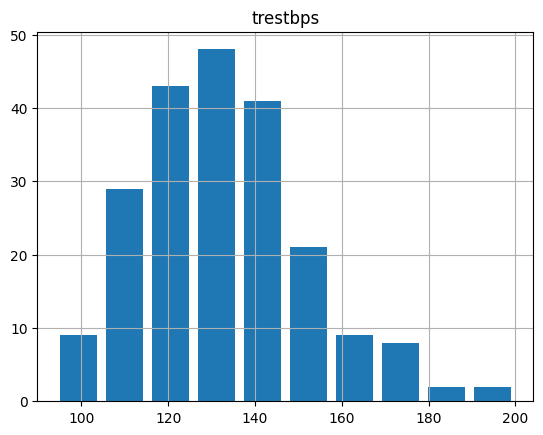

In [65]:
df['trestbps'].hist(rwidth=0.8)
plt.title('trestbps')

Text(0.5, 1.0, 'chol')

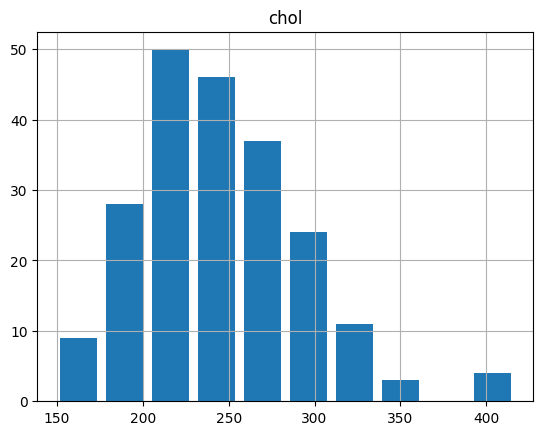

In [66]:
df['chol'].hist(rwidth=0.8)
plt.title('chol')

Text(0.5, 1.0, 'thalach')

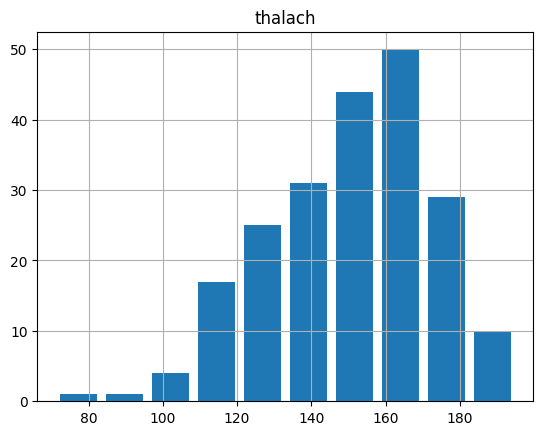

In [67]:
df['thalach'].hist(rwidth=0.8)
plt.title('thalach')

Text(0.5, 1.0, 'oldpeak')

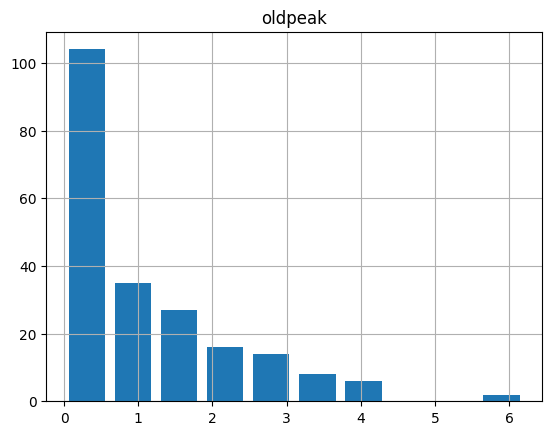

In [60]:
df['oldpeak'].hist(rwidth=0.8)
plt.title('oldpeak')

## #2 Modele